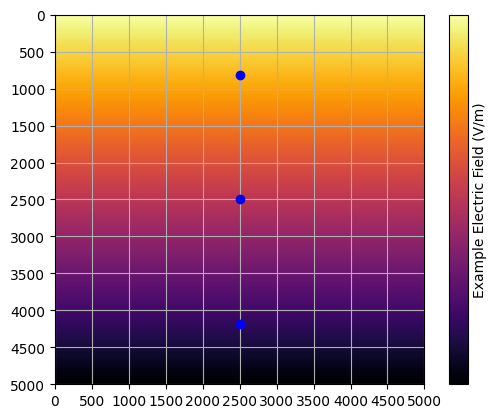

In [15]:
from Collision_Code_python import *
import numpy as np
import matplotlib.pyplot as plt
import time

# Define useful constants
amu = 1.67e-27 ; eps0 = 8.854e-12 ; qe = 1.6e-19 # SI units 

# Define physical params
m = 40. *amu; q = 1. *qe; wr = 2*np.pi*5e6; wz = 2*np.pi*.5e6 # SI units

# Define sim params
Nr = 5001 ; Nz = 5001 # number of cells related to trapping axis needs to be odd to allow null line
Nrmid = (Nr-1)/2 ; Nzmid = (Nz-1)/2 # middle cell which exists at r=0 (z=0) in physical units
Dr = Nr*1.5e-9 ; Dz = Nz*4.5e-9 # physical width in m of the sim
dr = Dr/float(Nr) ; dz = Dz/float(Nz) # width of a cell in z in m
Ezf = np.zeros((Nr, Nz)) ; Erf = np.zeros((Nr, Nz)) # array of electric fields s

# Here we'll make the DC and RF (pseudo)potentials
RF = makeRF0(m,q,wr,Nr,Nz,Nrmid,dr)
DC = makeDC(m,q,wz,Nz,Nr,Nzmid,dz)

l = 1

Ni = 3
vf = makeVf(Ni,1.0*q,m,l,wz,0,0,0,0)

# # Define dimensions
xaxis = np.linspace(0,Nr,1)
yaxis = np.linspace(0,Nz,1)
#could do multiple plots with varying coarseness and explain how computational cost quickly increases with increasing resolution
coarseness = 500
plt.xticks(np.arange(0, Nr, coarseness))
plt.yticks(np.arange(0, Nz, coarseness))
plt.plot(xaxis,yaxis)
#I can't figure out how to remove the x and y axis ticks without removing the grid lines
#Probably need to remove axis markers in post
plt.grid(True)


for i in range(Ni):
    ion = [ptovPos(vf[i,0],Nzmid,dz),ptovPos(vf[i,1],Nzmid,dz)]
    plt.plot(ion[0], ion[1], 'bo')

data = RF

plt.imshow(data, cmap='inferno')
plt.colorbar(label='Example Electric Field (V/m)', ticks=[])
# Show Figure
plt.show()